In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r"C:\Users\Shivam\Desktop\data preprocessing\Data-Preprocessing-with-Python-master\Data-Preprocessing-with-Python-master\Datasets\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
len(data)

1338

In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


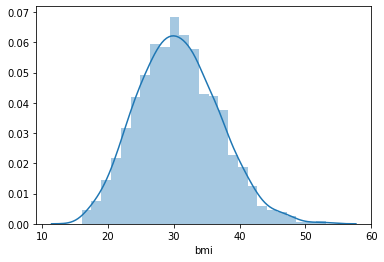

In [6]:
sns.distplot(data['bmi'])
plt.show()

In [7]:
data['bmi'].std(), data['bmi'].mean(), data['bmi'].median(), data['bmi'].var(),data['bmi'].quantile(q=0.75)

(6.098382190003366, 30.665470852017993, 30.4, 37.190265335350254, 34.7)

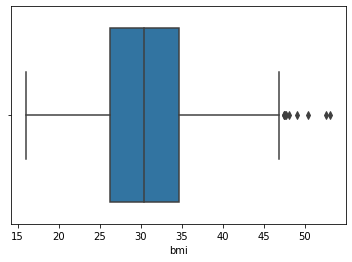

In [8]:
sns.boxplot(data['bmi'])
plt.show()

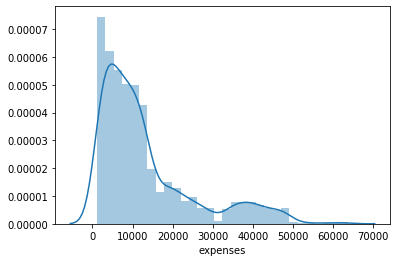

In [9]:
sns.distplot(data['expenses'])
plt.show()

In [10]:
data['expenses'].std(), data['expenses'].mean(), data['expenses'].median(), data['expenses'].var(), data['expenses'].quantile(q=0.75)

(12110.011239706457,
 13270.422414050803,
 9382.029999999999,
 146652372.22581673,
 16639.915)

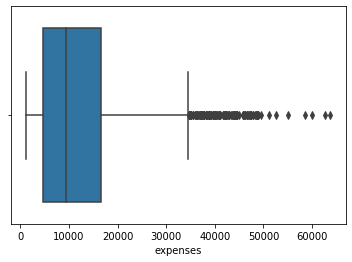

In [11]:
sns.boxplot(data['expenses'])
plt.show()

In [12]:
## listing outliers of expenses

q1 = data['expenses'].quantile(q=0.25)
q3 = data['expenses'].quantile(q=0.75)
iqr = q3-q1
floor = q1-1.5*q1
ceiling = q3+1.5*q1
outlier_indices = list(data['expenses'].index[(data['expenses']<floor) | (data['expenses']>ceiling)])
outlier_values = list(data['expenses'][outlier_indices])

In [25]:
print("Outlier Values : ",outlier_values[:10])   ## for expenses

Outlier Values :  [28923.14, 27808.73, 39611.76, 36837.47, 37701.88, 38711.0, 35585.58, 51194.56, 39774.28, 48173.36]


In [14]:
normal = data['expenses']    ## removing outliers of expenses
normal = normal.drop(outlier_indices)

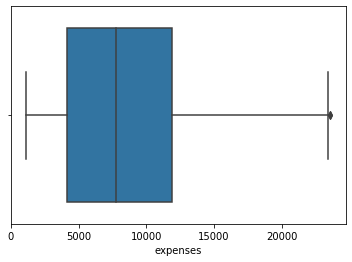

In [15]:
sns.boxplot(normal)    ## after removing outliers
plt.show()

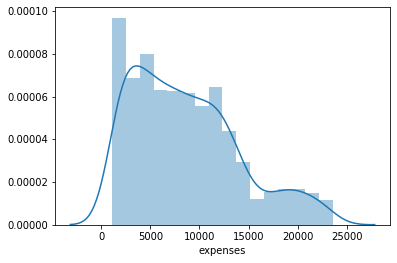

In [16]:
sns.distplot(normal)   ## after removing outliers
plt.show()

In [17]:
normal_exp = np.where(normal>16000, normal.mean(), normal)

In [18]:
normal.mean(), normal_exp.mean()

(8610.827155635057, 7370.331012173539)

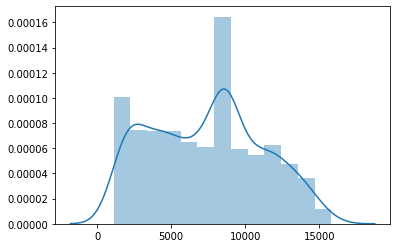

In [19]:
sns.distplot(normal_exp)   ## after removing outliers
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

In [31]:
print("Normal values (Not outliers):\n",normal[:10])

Normal values (Not outliers):
 0     16884.92
1      1725.55
2      4449.46
3     21984.47
4      3866.86
5      3756.62
6      8240.59
7      7281.51
8      6406.41
10     2721.32
Name: expenses, dtype: float64


In [198]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['expenses']])
scaled_data = pd.DataFrame(scaled_data,columns=["expenses"])

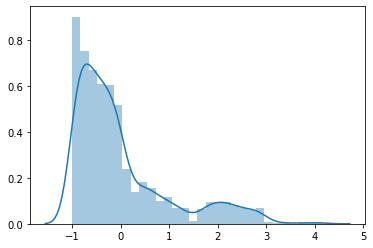

In [210]:
sns.distplot(scaled_data)   ## after standardization
plt.show()

In [26]:
data.groupby("smoker")[["expenses"]].max()


,expenses
smoker,
no,36910.61
yes,63770.43


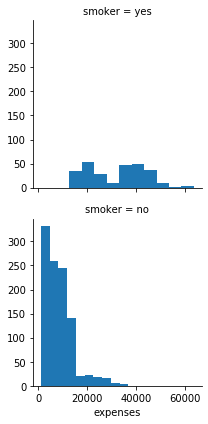

In [23]:
g = sns.FacetGrid(data,row="smoker")
g = g.map(plt.hist,"expenses")
plt.show()

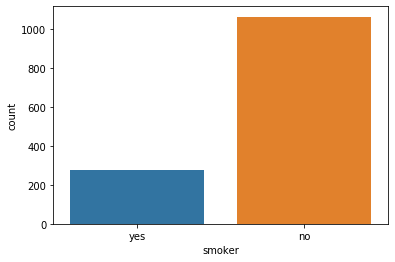

In [27]:
sns.countplot(data['smoker'])
plt.show()

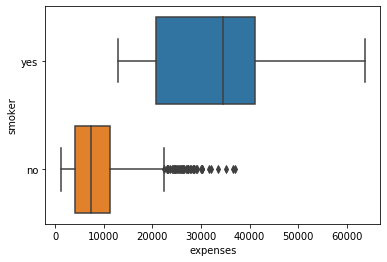

In [25]:
sns.boxplot(data['expenses'],data['smoker'])
plt.show()

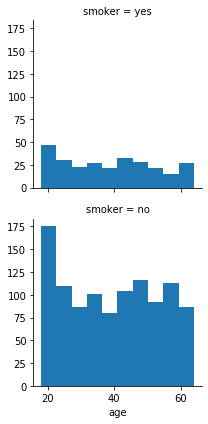

In [28]:
g = sns.FacetGrid(data,row="smoker")
g = g.map(plt.hist,"age")
plt.show()

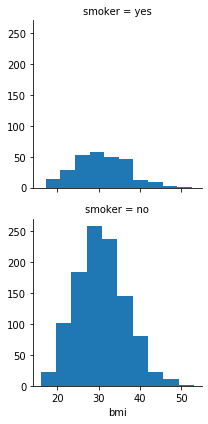

In [32]:
g = sns.FacetGrid(data,row="smoker")
g = g.map(plt.hist,"bmi")
plt.show()

In [42]:
smoke_y = data[data['smoker']=="yes"]
smoke_n = data[data['smoker']=="no"]

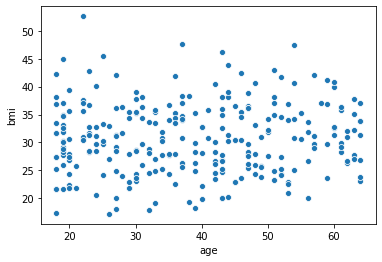

In [50]:
ax = sns.scatterplot(x="age",y="bmi",data=smoke_y)
plt.show()

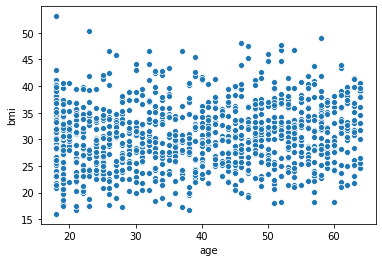

In [51]:
sns.scatterplot(x="age",y="bmi",data=smoke_n)
plt.show()

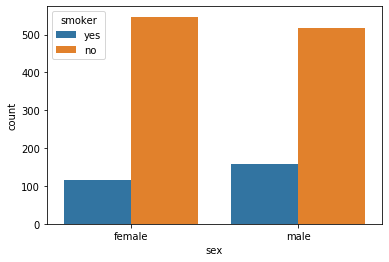

In [60]:
sns.countplot(data['sex'],hue=data['smoker'])
plt.show()

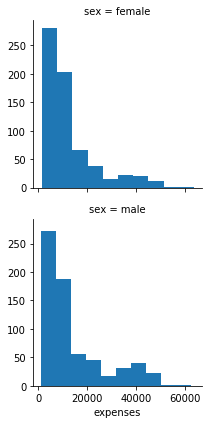

In [64]:
g = sns.FacetGrid(data,row='sex')
g = g.map(plt.hist,'expenses')

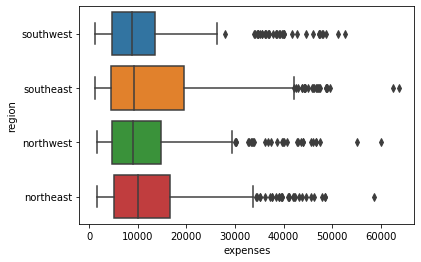

In [66]:
sns.boxplot(data['expenses'],data['region'])
plt.show()